## The Boston Housing Dataset

In the linear regression exercise, we created a model to estimate the price of housing based on the Boston Housing dataset.

This was a linear model that used the following variables:

* RM - average number of rooms per apartment (input variable)
* LSTAT - lower percentage of the population (input variable).
* MDEV - median value of owner-occupied dwellings in $1,000 (output variable)

As a reminder, the exact model was approximately as follows:

- Cost function value: 6.22
- R2 score: 0.76
- RMSE: 3.52

# Objective
The objective of this exercise is to create a model using a simple feedforward neural network.

# Data preparation

## Data loading

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv ("..\\dataset\\HousingData.csv")

## Data exploration
A more detailed survey can be found in the previous exercise. Here we repeat the steps only for reminders.

In [ ]:
data.info()

It is useful to have an overview of the input data before selecting and building the model.
This can prevent problems later on. For example, some models require specific data.

In [ ]:
data.head(10)

In [ ]:
data.describe()

In [ ]:
corr=data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

## Data cleaning

Display columns with NULL values

In [ ]:
print (data.isnull().sum())

Delete rows with NULL values

In [ ]:
data=data.dropna()

## Split into input and output parameters
Unlike the linear model, we will use all columns. 

In [ ]:
X = data.iloc[:, 0:13]
Y = data['MEDV']

In [ ]:
X.describe()

In [ ]:
X.head()

In [ ]:
Y.describe()

In [ ]:
Y.head()

## Data standardization
Neural networks generally work better with standardized data because changes in weights are proportionally reflected in all parameters equally.

Now each feature has a different mean, a different standard deviation.

Reasons for standardization:
* To prevent certain features from dominating the model.
* To prevent machine learning models from converging faster.

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum(x) / count(x)
* standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))

For standardization we use StandardScaler from the scikit-learn library.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

The same transformation needs to be performed on the actual input data. The scaling settings found during training must be stored for reuse.

We use the joblib library to store the binary form of the sc instance in a binary file.

In [ ]:
import joblib
joblib.dump(sc, 'std_scaler.bin', compress=True)
sc=joblib.load('std_scaler.bin')

## Splitting the dataset into training, testing and validation subsets

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

# Creating a neural network
The Keras library will be used to develop the neural network.

In [ ]:
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Sequential

## Network structure

We create a sequential neural network model. Data pass from the input layer through hidden layers to the output layer (feed forward network).

The number of input variables is 13.

In [ ]:
model = Sequential()
model.add(Input(shape=(13,))) 

První skrytá vrstva bude plně propojena se vstupnímí parametry, těch je 13. Vrstva bude obsahovat 128 neuronů. Aktivační funkce bude relu

* Dense layer connects each neuron from the previous layer to every neuron in the layer (fully connected layer).
* We will use ReLU and linear function as activation function. 
* Linear function is used in the output layer because this project is to return a positive real number.
* The purpose of the activation function is to introduce nonlinearity into the output of the neuron.

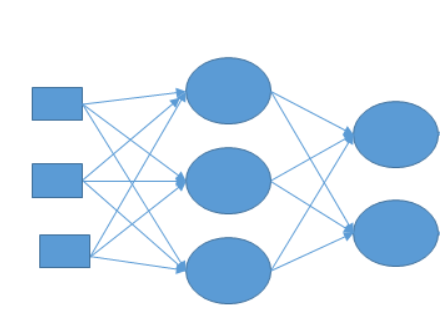

In [ ]:
model.add(Dense(128, activation = 'relu'))

The second hidden layer will also be fully interconnected. The number of neurons will be 64. 

Unlike tensorflow or pytorch libraries, we do not need to specify the number of input parameters. This is automatically obtained from the previous layer.

In [ ]:
model.add(Dense(64, activation  = 'relu'))

The third layer is again fully interconnected.

In [ ]:
model.add(Dense(32, activation  = 'relu'))

The fourth layer is again fully connected and has 16 neurons. 

The activation function will be linear.

In [ ]:
model.add(Dense(16, activation  = 'linear'))

Since we are creating a model to predict a single value, the output will have one output neuron connected to all previous neurons.

In [ ]:
model.add(Dense(1))

## Nastavení parametrů učení

Once we have the network structure designed, we need to specify additional parameters for training.

* The optimizer we will use will be Adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to iteratively update the network weights based on the training data.
* The loss function will be the mean square error (MSE)
* During learning, another metric is also computed - the mean absolute error (MAE)

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

## Neural network visualization
We can visualize the structure of a neural network using a table.

We can see the types of layers, the shapes of data that enter the layer and the number of parameters that will need to be learned.

In [ ]:
model.summary()

The model can also be visualized in an image

Because we have a larger number of neurons, the network in the figure is truncated.

In [ ]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

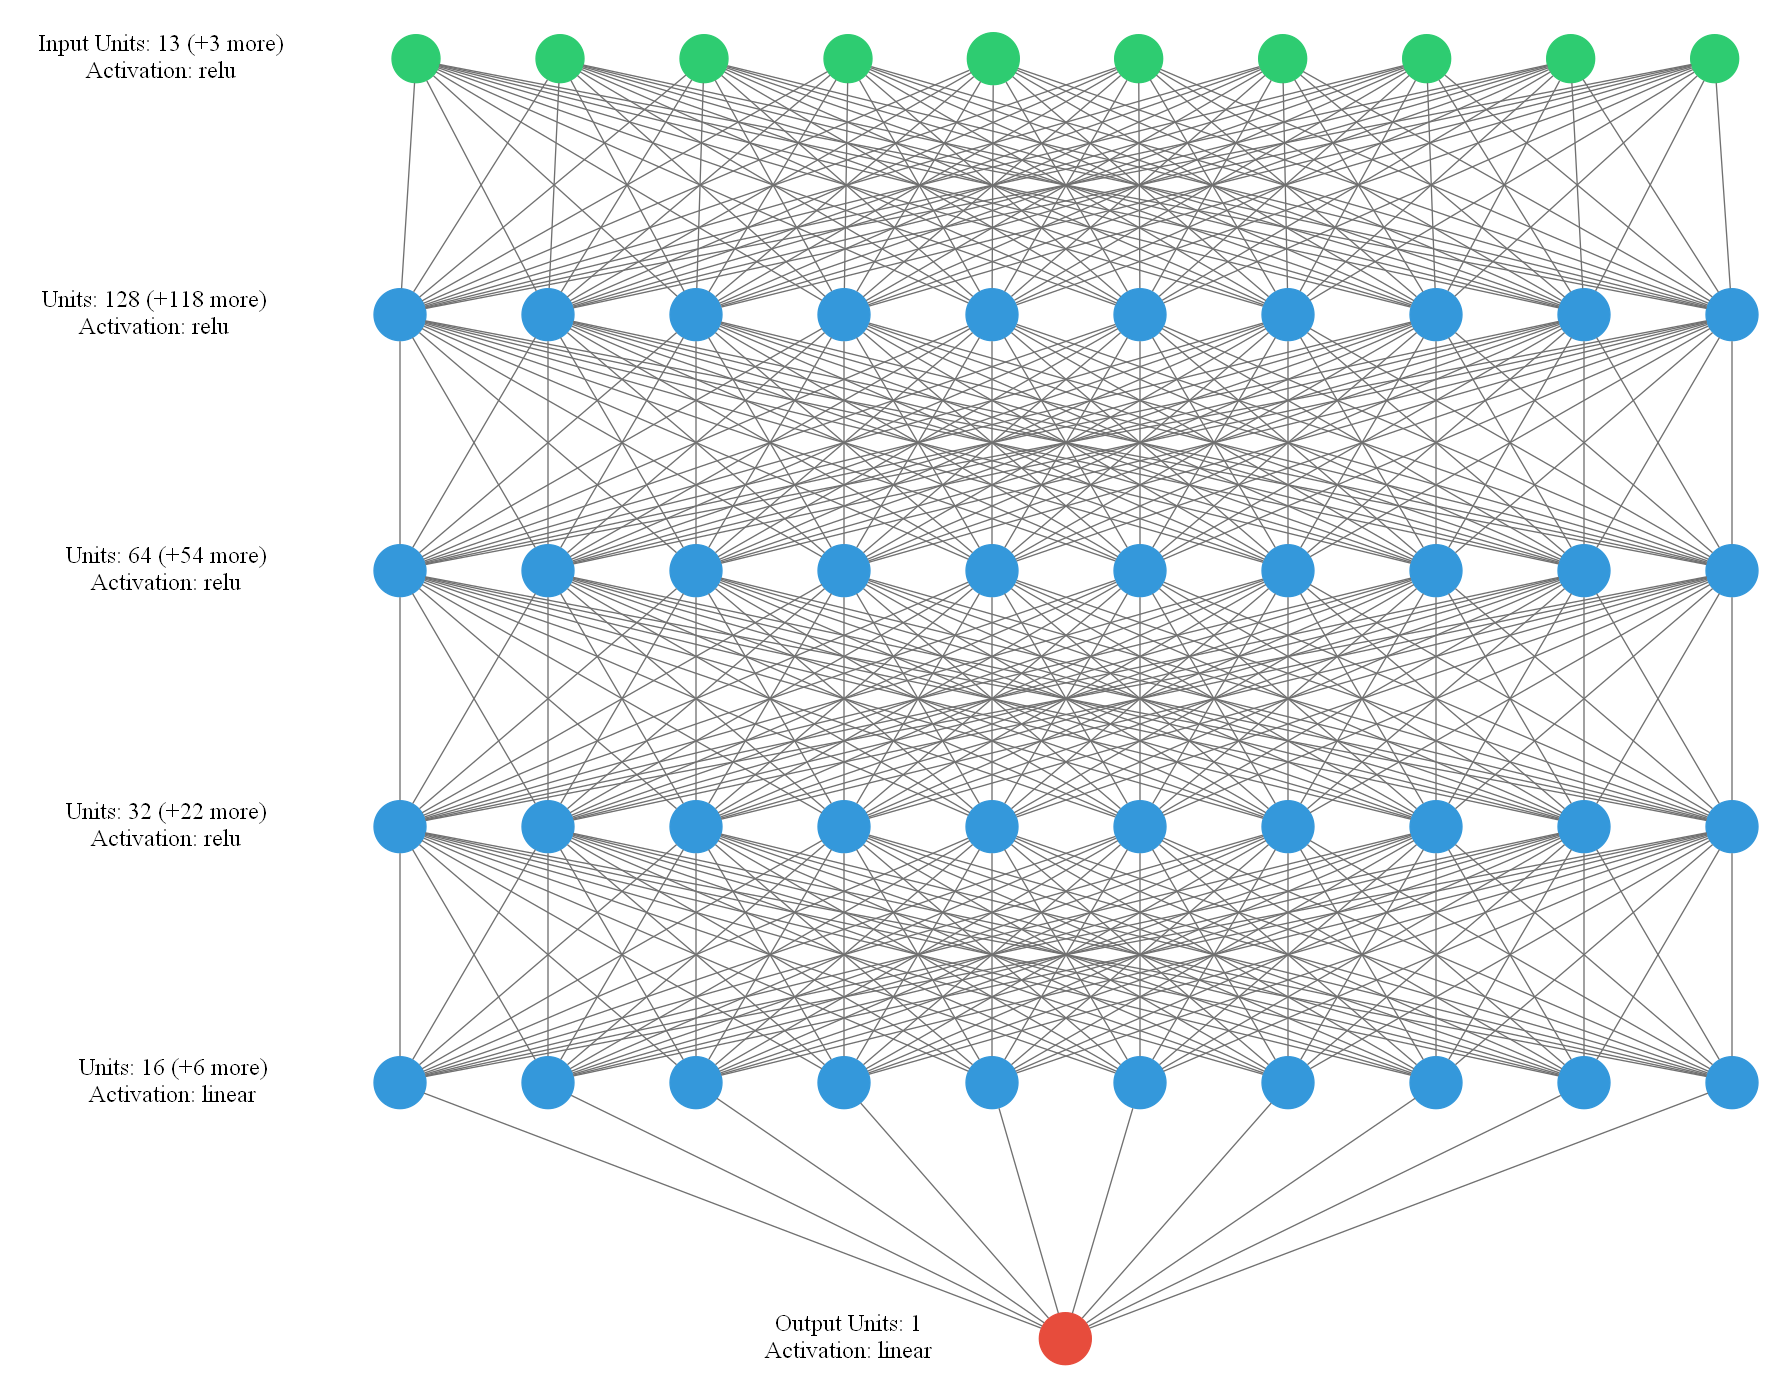

## Learning

The learning process is performed by a fit method that is called with the following parameters.

* X_train, Y_train - training data set
* epochs - maximum repetition time of learning data
* batch_size - training data is divided into batches
* validation_data - after epochs, the quality of the model is tested on the validation dataset that is not used for training.
* callbacks - training can be stopped if even a few training epochs do not result in model improvement.

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train, Y_train, epochs = 100, batch_size=5, validation_data=(X_val, Y_val), callbacks=[early_stop])

## Evaluation of the model
The trained model is evaluated on the test dataset. This data model was not seen during the learning phase.

The model predicts the outcome from the input test data.

In [ ]:
Y_pred = model.predict(X_test)

R2 (coefficient of determination) is used to evaluate the function. The best possible result is 1.0. The model predicts the results to be compared with the actual results.

This score can be used to select the best model.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print('R2 score: {}'.format(r2))

For comparison, a linear regression produced a model that had an R2 score of 0.75

Thus, the neural network can better predict the price of houses. There may be several reasons
- 13 input parameters are used instead of 2
- The neural network can also handle non-linear dependencies

## History of learning

We can see how the learning took place on the graphs. The correct learning history is one where the cost function decreases with the number of iterations.

In [ ]:
plt.plot(history.history['loss'], label='MSE cost function (training data)')
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('Number of epochs')
plt.legend(loc="upper left")
plt.show()

Similar graph for Mean Absolute Error.

In [ ]:
plt.title('Mean Absolute Error')
plt.xlabel('Počet epoch')
plt.ylabel('MAE')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.legend(['Nákladová funkce MAE (training data)'])
plt.show()

## Save model to file
It is a good idea to save the trained model for later use.

In [ ]:
model.save('regresion_model.keras')

# Inference
Inference is the application of a trained model in practice. We pass input data to the neural network and it returns output data.

It may seem like a blackbox.

When using the created model, you need to load the scaler and the model.

In [ ]:
sc=joblib.load('std_scaler.bin')

In [ ]:
model = keras.models.load_model('regresion_model.keras')

The input data must be in the form of a vector. We will use the data from the first row of the data file. The correct result should be 24.

In [ ]:
data = np.array([0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98])
data = data.reshape(1, -1)

Since we learned the neural network on standardized data, we need to perform the same standardization on our input data.

In [ ]:
sdata = sc.transform(data)

We run the neural network prediction.

In [ ]:
Y_pred = model.predict(sdata)

Let's list the result.

In [ ]:
print (f"The estimated MEDV is {Y_pred[0][0]}")